# TASK 4.9 (C)
# Part 2

#### Table of Content

1. Importing Libraries 
2. Dataframe
3. Checking the Dataframe
4. Creating Visualizations
5. Exporting Charts

> ##### D1: Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 2. Dataframe

In [2]:
path = r'/Users/charliegehant/Dropbox/4. Career Foundry/Achievement 4 - Python Fundamentals for Data Analysts/02-2022 Instacart Basket Analysis'

In [3]:
path

'/Users/charliegehant/Dropbox/4. Career Foundry/Achievement 4 - Python Fundamentals for Data Analysts/02-2022 Instacart Basket Analysis'

In [4]:
# Importing dataframe from part 1
df_OPC = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

## 3. Checking the Dataframe

In [6]:
# Making sure everything looks ok

df_OPC.shape

(32435059, 36)

In [7]:
df_OPC.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,n_dependants,income,family_status,user_id_merge
0,2539329,1,prior,1,2,8,0.0,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,40423,Married,both
1,2539329,1,prior,1,2,8,0.0,14084,2,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,40423,Married,both
2,2539329,1,prior,1,2,8,0.0,12427,3,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,40423,Married,both
3,2539329,1,prior,1,2,8,0.0,26088,4,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,40423,Married,both
4,2539329,1,prior,1,2,8,0.0,26405,5,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,40423,Married,both


## 4. Creating Visualizations

### 4a. DIRECTION #2

> ##### D2: If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

<AxesSubplot:>

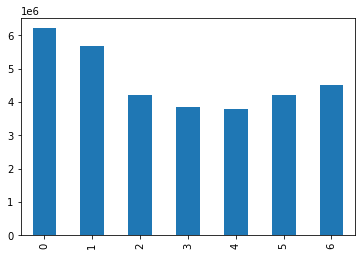

In [8]:
# creating a basic bar chart, according to indexed order (0-6)

df_OPC['orders_day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:ylabel='Frequency'>

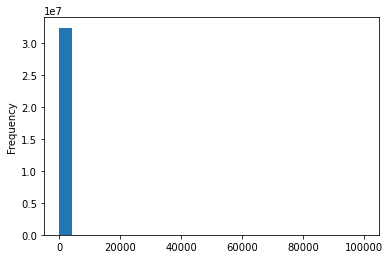

In [9]:
# Attempting to creste a histogram, but there is a problem with outliers

df_OPC['prices'].plot.hist(bins = 25)

In [10]:
# I can see max price is $99999, which is a lot. 
# However median (7.40) and mean (1.19) are much lower and seem normal. 

df_OPC['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<AxesSubplot:xlabel='prices', ylabel='prices'>

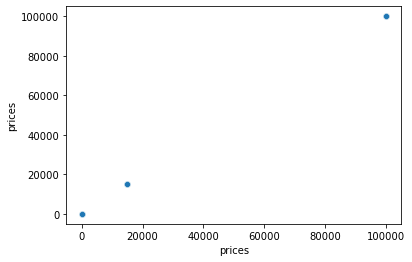

In [11]:
# On this scatterplot I can visually see the outlier(s)

sns.scatterplot(x = 'prices', y = 'prices',data = df_OPC)

In [12]:
# I'm isolating any products priced above 100 to solve the issue

df_check = df_OPC.loc[df_OPC['prices'] > 100]

In [13]:
# Checking the head and tail, here are the culprits..

df_check[['prices', 'product_name']].head()

,prices,product_name
1576,14900.0,Lowfat 2% Milkfat Cottage Cheese
1638,14900.0,Lowfat 2% Milkfat Cottage Cheese
16534,14900.0,Lowfat 2% Milkfat Cottage Cheese
16540,14900.0,Lowfat 2% Milkfat Cottage Cheese
53712,14900.0,Lowfat 2% Milkfat Cottage Cheese


In [14]:
df_check[['prices', 'product_name']].tail()

,prices,product_name
32350634,14900.0,Lowfat 2% Milkfat Cottage Cheese
32377867,14900.0,Lowfat 2% Milkfat Cottage Cheese
32377877,14900.0,Lowfat 2% Milkfat Cottage Cheese
32410707,14900.0,Lowfat 2% Milkfat Cottage Cheese
32410731,14900.0,Lowfat 2% Milkfat Cottage Cheese


In [15]:
# Transforming these abnormal values into NaN for now

df_OPC.loc[df_OPC['prices'] >100, 'prices'] = np.nan

In [16]:
# Now the outliers are gone, the max price is $25, which seems correct

df_OPC['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

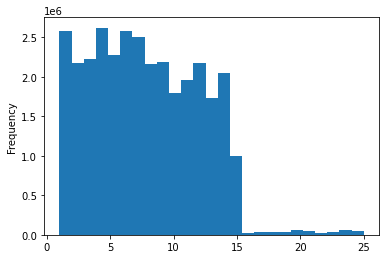

In [17]:
# Re-running the histogram query with bins = 25

df_OPC['prices'].plot.hist(bins = 25)

<AxesSubplot:ylabel='Frequency'>

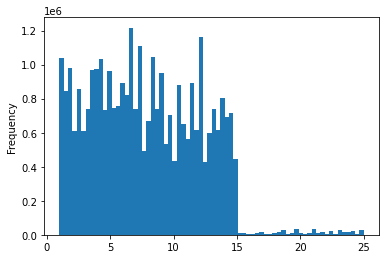

In [18]:
# And with bins = 70

df_OPC['prices'].plot.hist(bins = 70)

<AxesSubplot:xlabel='prices', ylabel='prices'>

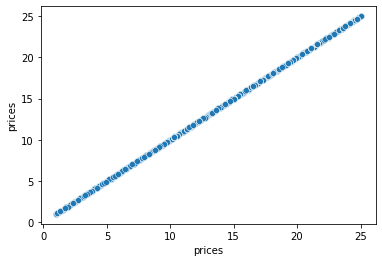

In [19]:
sns.scatterplot(x = 'prices', y = 'prices',data = df_OPC)

In [20]:
# Preparing the data to create a line chart.
# Creating a list holding True/False values - randomizing data into 70/30 split (0.7)

np.random.seed(4)
dev = np.random.rand(len(df_OPC)) <= 0.7

In [21]:
# Storing 70% of the sample in the dataframe big

big = df_OPC[dev]

In [22]:
# Storing 30% of the sample in the dataframe small

small = df_OPC[~dev]

In [23]:
df_OPC.shape

(32435059, 36)

In [24]:
len(df_OPC)

32435059

In [25]:
# Checking the query

len(big)

22705099

In [26]:
len(small)

9729960

In [27]:
# The big + small subsets are equal to the whole dataframe

len(big) + len(small)

32435059

In [28]:
# Further reducing size of sample df to only two variables to minimize processing load

df_OPC_2 = small[['orders_day_of_week','prices']]

In [29]:
df_OPC_2.head()

,orders_day_of_week,prices
0,2,9.0
2,2,4.4
3,2,4.7
6,3,3.0
10,3,4.0


In [30]:
# Here I can see the new smaller dataframe is much smaller, but all the core characteristics remain the same

df_OPC_2.describe()

,orders_day_of_week,prices
count,9.729960e+06,9.719281e+06
mean,2.738543e+00,7.791522e+00
std,2.089969e+00,4.240544e+00
min,0.000000e+00,1.000000e+00
25%,1.000000e+00,4.200000e+00
50%,3.000000e+00,7.400000e+00
75%,5.000000e+00,1.130000e+01
max,6.000000e+00,2.500000e+01


In [31]:
# Compairing new snall dataframe with original one; the only difference is in the count of values. 

df_OPC[['orders_day_of_week','prices']].describe()

,orders_day_of_week,prices
count,3.243506e+07,3.239973e+07
mean,2.738815e+00,7.790994e+00
std,2.090051e+00,4.241809e+00
min,0.000000e+00,1.000000e+00
25%,1.000000e+00,4.200000e+00
50%,3.000000e+00,7.400000e+00
75%,5.000000e+00,1.130000e+01
max,6.000000e+00,2.500000e+01


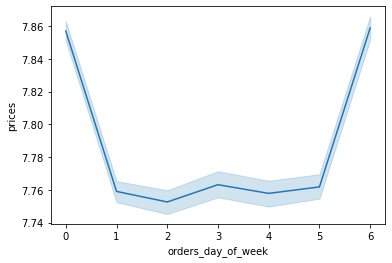

In [32]:
# Creating a line chart exploring the relationship between orders by day of the week by average prices

line = sns.lineplot(data = df_OPC_2, x = 'orders_day_of_week', y = 'prices')

In [38]:
# Checking the results in a numerical form (I can see they correlate)

df_OPC.groupby('orders_day_of_week').agg({'prices': ['sum', 'mean', 'median', 'count']})

prices                          
                           sum      mean median    count
orders_day_of_week                                      
0                   48743215.0  7.857590    7.5  6203329
1                   43914435.4  7.759697    7.3  5659298
2                   32669718.5  7.754309    7.3  4213105
3                   29787695.9  7.757485    7.3  3839865
4                   29343126.6  7.756223    7.3  3783172
5                   32641807.1  7.762477    7.3  4205076
6                   35326122.1  7.857431    7.5  4495887

### 4b. DIRECTION #3

> ##### D3: You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column. In a markdown cell beneath your histogram, describe what the histogram demonstrates.

<AxesSubplot:ylabel='Frequency'>

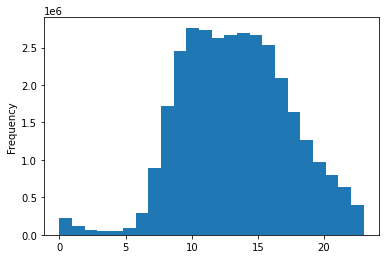

In [42]:
# Creating the histogram requested with 24 bins (24 hours in a day). 

df_OPC['order_hour_of_day'].plot.hist(bins = 24)

<AxesSubplot:ylabel='Frequency'>

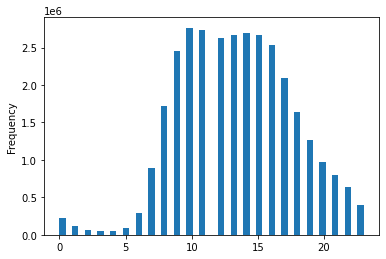

In [43]:
# Creating the histogram requested with 48 bins (24 x2), to have a clearer view of what's happening. 

df_OPC['order_hour_of_day'].plot.hist(bins = 48)

In [44]:
# Double checking the values on a numerical level

df_OPC['order_hour_of_day'].value_counts(dropna = False)

10    2764476
11    2738647
14    2691598
15    2664583
13    2663346
12    2620898
16    2537506
9     2456751
17    2089510
8     1719991
18    1637956
19    1259416
20     977049
7      891951
21     796379
22     634743
23     402621
6      290796
0      218951
1      115787
5       88064
2       69435
4       53284
3       51321
Name: order_hour_of_day, dtype: int64

### Descriptive findings about sales: 
##### > The Histogram demonstrates that most of the orders happen between 9am - 4pm, with a slight dip around lunch time (12pm)
##### > The busiest time for orders is between 10am-11am
##### > The quietest time for orders is between 3am-4am
##### > The sales decrease rapidly after 4pm, somewhat surprinsgly there is no sales increase around dinner time / after work time. 

### 4c. DIRECTION #4

> ##### D4: The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

In [45]:
df_OPC[['user_id','loyalty_flag']].head()

,user_id,loyalty_flag
0,1,New customer
1,1,New customer
2,1,New customer
3,1,New customer
4,1,New customer


<AxesSubplot:>

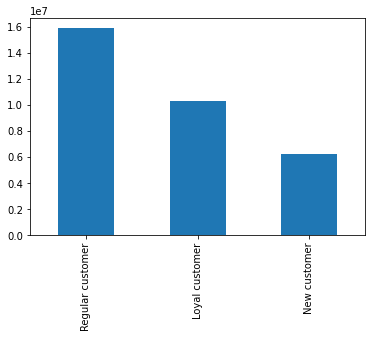

In [46]:
df_OPC['loyalty_flag'].value_counts().plot.bar()

In [47]:
df_OPC['loyalty_flag'].value_counts()

Regular customer    15891507
Loyal customer      10294027
New customer         6249525
Name: loyalty_flag, dtype: int64

### 4d. DIRECTION #5

> ##### D5: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [48]:
# Further reducing size of sample df to only the two variables I need

df_OPC_3 = small[['order_hour_of_day','prices']]

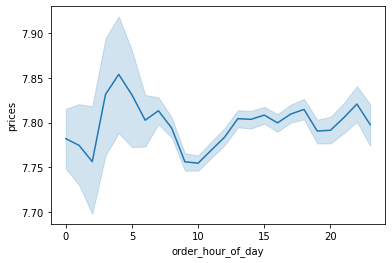

In [49]:
# Creating a line chart 
# The more expensive items are sold at night and the cheapest between 9am-10am

line2 = sns.lineplot(data = df_OPC_3, x = 'order_hour_of_day', y = 'prices')

In [56]:
df_OPC.groupby('order_hour_of_day').agg({'prices': ['sum', 'mean', 'median', 'count']})

prices                          
                          sum      mean median    count
order_hour_of_day                                      
0                   1708627.1  7.811152    7.4   218742
1                    902987.5  7.805706    7.4   115683
2                    540953.3  7.799211    7.4    69360
3                    401331.1  7.828101    7.5    51268
4                    417265.0  7.838612    7.5    53232
5                    688439.9  7.828162    7.5    87944
6                   2270680.7  7.817802    7.4   290450
7                   6967055.9  7.820043    7.4   890923
8                  13383026.7  7.790509    7.4  1717863
9                  19026013.7  7.753561    7.3  2453842
10                 21399997.5  7.749879    7.3  2761333
11                 21261917.8  7.772038    7.3  2735694
12                 20392992.7  7.789222    7.4  2618104
13                 20734933.8  7.793418    7.4  2660570
14                 20979668.4  7.802823    7.4  2688728
15                 20777235.8  7.805949    7.4  2661718
16                 19777858.5  7.802705    7.4  2534744
17                 16294342.6  7.806522    7.4  2087273
18                 12778651.1  7.809833    7.4  1636226
19                  9805648.8  7.794163    7.4  1258076
20                  7613150.3  7.800359    7.4   976000
21                  6209527.7  7.805543    7.4   795528
22                  4957118.0  7.816838    7.4   634159
23                  3136696.7  7.797452    7.4   402272

### 4e. DIRECTION #6

> ##### D6: Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [61]:
df_OPC.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,n_dependants,income,family_status,user_id_merge
0,2539329,1,prior,1,2,8,0.0,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,40423,Married,both
1,2539329,1,prior,1,2,8,0.0,14084,2,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,40423,Married,both
2,2539329,1,prior,1,2,8,0.0,12427,3,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,40423,Married,both
3,2539329,1,prior,1,2,8,0.0,26088,4,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,40423,Married,both
4,2539329,1,prior,1,2,8,0.0,26405,5,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,40423,Married,both


In [62]:
# Further reducing size of sample df to only the two variables I need

df_OPC_4 = small[['age','n_dependants']]

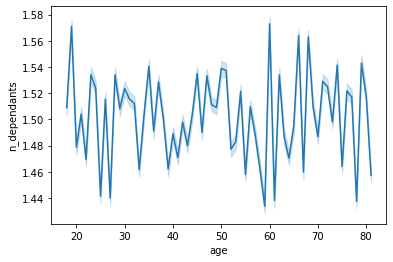

In [63]:
# Creating a line chart to explore the relationship between age and number of dependants. 

line3 = sns.lineplot(data = df_OPC_4, x = 'age', y = 'n_dependants')

> <i> >> There is no clear relationship between age and number of dependants. 

### 4f. DIRECTION #7

> ##### D7: You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.


<AxesSubplot:xlabel='age', ylabel='income'>

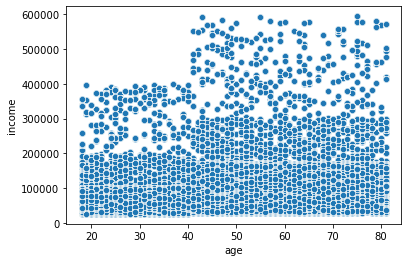

In [64]:
# Creating a scatterplot to explore the relationship between age and income. 

sns.scatterplot(x = 'age', y = 'income',data = df_OPC)

> <i> There is a connection between age and spending power. The age range 20-40 has less spending power than 40+ years old. Although it makes sense that older people have greater incomes (more settled into their careers / more experience), it is a bit odd how much salaries seem to abruptly jump from 40 years old onwards. Especially the top left corner, a blank rectangle without a single outlier. 

## 5. Exporting Charts

> ##### D8: Export your visualizations as “.png” files in your relevant project folder.

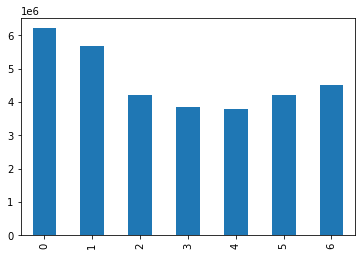

In [65]:
# Re-creating and naming bar chart to prepare for export

bar_orders_dow = df_OPC['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [66]:
# Exporting bar chart

bar_orders_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

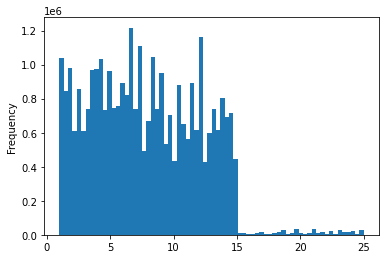

In [67]:
# Re-creating and naming histogram to prepare for export

hist_prices = df_OPC['prices'].plot.hist(bins = 70)

In [68]:
# Exporting histogram

hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [69]:
# Saving the line chart named 'line'

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_ords_dow_prices.png'))

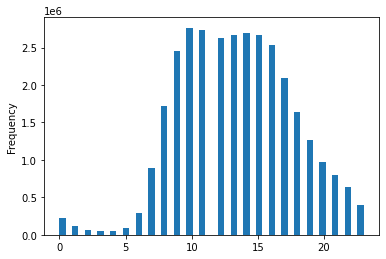

In [70]:
# Re-creating and naming histogram to prepare for export

hist_ords_hod_b48 = df_OPC['order_hour_of_day'].plot.hist(bins = 48)

In [71]:
# Exporting histogram

hist_ords_hod_b48.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_ords_hod_b48.png'))

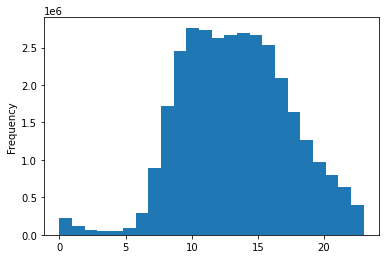

In [72]:
# Re-creating and naming histogram to prepare for export

hist_ords_hod_b24 = df_OPC['order_hour_of_day'].plot.hist(bins = 24)

In [73]:
# Exporting histogram

hist_ords_hod_b24.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_ords_hod_b24.png'))

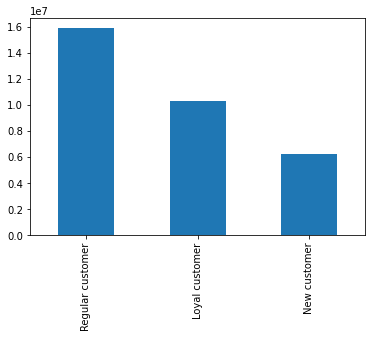

In [74]:
# Re-creating and naming histogram to prepare for export

bar_loy_flag = df_OPC['loyalty_flag'].value_counts().plot.bar()

In [75]:
# Exporting bar chart

bar_loy_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loy_flag.png'))

In [76]:
# Exporting the line chart named 'line2'

line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_ords_how_prices.png'))

In [77]:
# Exporting the line chart named 'line3'

line3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

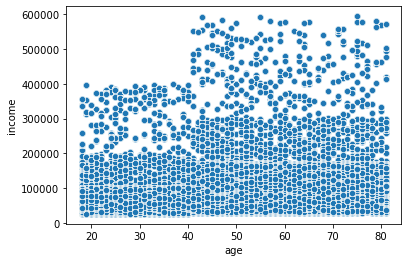

In [78]:
# Re-creating and naming scatterplot to prepare for export

scat_age_income = sns.scatterplot(x = 'age', y = 'income',data = df_OPC)

In [79]:
# Exporting the scatterplot

scat_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_age_income.png'))